In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()


In [ ]:
# df.describe()
# df.info()

df.oldpeak.unique()

In [ ]:
df.groupby('target').target.count()

In [ ]:

# x_train, x_test, y_train, 
print((x_test))

In [ ]:
# split x and y
x = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

# Train test split
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.33, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test) 

# Baseline model
from sklearn.dummy import DummyClassifier
model_bl = DummyClassifier(strategy='uniform').fit(x_train_s,y_train)
predict_train = model_bl.predict(x_train_s)
predict_test = model_bl.predict(x_test_s)

# Random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(x_train_s,y_train)
predict_train = model_rf.predict(x_train_s)
predict_test = model_rf.predict(x_test_s)

# model performance
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,predict_test)
precision, recall, _ = metrics.precision_recall_curve(y_test,predict_test)

print(metrics.confusion_matrix(y_test,predict_test))
print(metrics.classification_report(y_test,predict_test))
print(metrics.accuracy_score(y_test,predict_test))
print(f'AUC-ROC score : {metrics.auc(fpr,tpr)}')
print(f'AUC-PR score : {metrics.auc(recall,precision)}')

# metrics.PrecisionRecallDisplay(precision,recall).plot()
# metrics.RocCurveDisplay(fpr,tpr).plot()

# Calibration layer
# Calibration plot

In [ ]:
print(np.arange(10, 100, 10))
print(np.linspace(10,101,10))

In [ ]:
np.array(y_test, np.percentile(y_test,np.arange(10,101,10)))

In [ ]:
y_test_pp = model_rf.predict_proba(x_test_s)[:,1]
y_test = np.array(y_test)
prob_deciles = np.linspace(y_test_pp.min(),y_test_pp.max(),11)

pp_values = []
ep_values = []

for i in range(len(prob_deciles)-1):
    pp_values.append((prob_deciles[i] + prob_deciles[i+1])/2)
    ep_values.append(np.mean(y_test[(y_test_pp >= prob_deciles[i]) & (y_test_pp < prob_deciles[i+1])]))

In [64]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression().fit(y_test_pp.reshape(-1,1),y_test)

y_test_cl = model_lr.predict_proba(y_test)[:,1]
y_val_cl = model_lr.predict_proba(y_val)[:,1]

y_val = np.array(y_val)
val_deciles = np.linspace(y_val_cl.min(),y_val_cl.max(),11)
emp_prob = []
prp_prob = []

for i in range(len(val_deciles)-1):
    prp_prob.append((val_deciles[i] + val_deciles[i])/2)
    emp_prob.append(np.mean(y_val[(y_val_cl >= val_deciles[i]) & (y_val_cl < val_deciles[i+1])]))

[0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.04110421525996833, 0.13455254716625206, 0.2280008790725358, 0.3214492109788195, 0.4148975428851033, 0.508345874791387, 0.6017942066976707, 0.6952425386039545, 0.7886908705102382, 0.882139202416522]


/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priya/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/priya/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


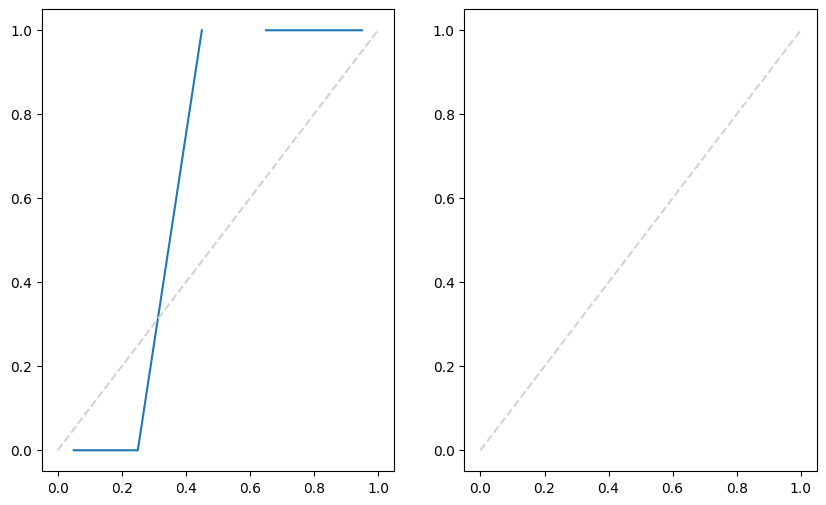

In [71]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(pp_values,ep_values)
ax[1].plot(prp_prob,emp_prob)
ax[0].plot([0,1],[0,1],linestyle='--',color='lightgrey')
ax[1].plot([0,1],[0,1],linestyle='--',color='lightgrey')
plt.show()